This dataset pertains to healthcare appointments and is aimed at predicting patient no-shows. When a patient schedules a doctor’s appointment, they receive necessary instructions, yet some patients still fail to attend. Understanding and predicting these no-shows is critical for improving healthcare operations and resource allocation. This dataset will allow us to explore various demographic factors, including age, gender, and socioeconomic background, which may influence patient attendance.

A primary focus of this analysis is to assess if and how demographic biases may affect machine learning models in predicting no-show rates. By examining patterns across patient demographics, we aim to uncover any inherent biases within the data.


Research Question
Which demographic factors affect biases in Machine Learning prediction models for no-show in healthcare appointments?

Which techniques can be used to mitigate these biases   ?

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import math


###In the below cell we will load the data from the CSV file in to a DataFrame

In [2]:
df = pd.read_csv(r"KaggleV2-May-2016.csv")

df


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


# General Data Overview

In [3]:
print("\nData Overview")
print("Shape of dataset:", df.shape)
print("Columns:", df.columns)
print(df.head())


Data Overview
Shape of dataset: (110527, 14)
Columns: Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')
      PatientId  AppointmentID Gender          ScheduledDay  \
0  2.987250e+13        5642903      F  2016-04-29T18:38:08Z   
1  5.589980e+14        5642503      M  2016-04-29T16:08:27Z   
2  4.262960e+12        5642549      F  2016-04-29T16:19:04Z   
3  8.679510e+11        5642828      F  2016-04-29T17:29:31Z   
4  8.841190e+12        5642494      F  2016-04-29T16:07:23Z   

         AppointmentDay  Age      Neighbourhood  Scholarship  Hipertension  \
0  2016-04-29T00:00:00Z   62    JARDIM DA PENHA            0             1   
1  2016-04-29T00:00:00Z   56    JARDIM DA PENHA            0             0   
2  2016-04-29T00:00:00Z   62      MATA DA PRAIA            0             0   
3  2016-04-29T00:

# Data Information and Summary

In [4]:

print("\nDataset Information")
df.info()


Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
print("\nSummary Statistics")
print(df.describe())


Summary Statistics
          PatientId  AppointmentID            Age    Scholarship  \
count  1.105270e+05   1.105270e+05  110527.000000  110527.000000   
mean   1.474963e+14   5.675305e+06      37.088874       0.098266   
std    2.560949e+14   7.129575e+04      23.110205       0.297675   
min    3.920000e+04   5.030230e+06      -1.000000       0.000000   
25%    4.172615e+12   5.640286e+06      18.000000       0.000000   
50%    3.173180e+13   5.680573e+06      37.000000       0.000000   
75%    9.439170e+13   5.725524e+06      55.000000       0.000000   
max    9.999820e+14   5.790484e+06     115.000000       1.000000   

        Hipertension       Diabetes     Alcoholism        Handcap  \
count  110527.000000  110527.000000  110527.000000  110527.000000   
mean        0.197246       0.071865       0.030400       0.022248   
std         0.397921       0.258265       0.171686       0.161543   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000  

# Check for Missing Values


In [6]:
print("\nMissing Values Count")
print(df.isnull().sum())


Missing Values Count
PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64


# Unique Values and Data Types

In [7]:

for column in df.columns:
    print(f"\nUnique values in {column}: {df[column].nunique()}")
    print(df[column].unique())


Unique values in PatientId: 61744
[2.98725e+13 5.58998e+14 4.26296e+12 ... 7.26331e+13 9.96998e+14
 1.55766e+13]

Unique values in AppointmentID: 110527
[5642903 5642503 5642549 ... 5630692 5630323 5629448]

Unique values in Gender: 2
['F' 'M']

Unique values in ScheduledDay: 103549
['2016-04-29T18:38:08Z' '2016-04-29T16:08:27Z' '2016-04-29T16:19:04Z' ...
 '2016-04-27T16:03:52Z' '2016-04-27T15:09:23Z' '2016-04-27T13:30:56Z']

Unique values in AppointmentDay: 27
['2016-04-29T00:00:00Z' '2016-05-03T00:00:00Z' '2016-05-10T00:00:00Z'
 '2016-05-17T00:00:00Z' '2016-05-24T00:00:00Z' '2016-05-31T00:00:00Z'
 '2016-05-02T00:00:00Z' '2016-05-30T00:00:00Z' '2016-05-16T00:00:00Z'
 '2016-05-04T00:00:00Z' '2016-05-19T00:00:00Z' '2016-05-12T00:00:00Z'
 '2016-05-06T00:00:00Z' '2016-05-20T00:00:00Z' '2016-05-05T00:00:00Z'
 '2016-05-13T00:00:00Z' '2016-05-09T00:00:00Z' '2016-05-25T00:00:00Z'
 '2016-05-11T00:00:00Z' '2016-05-18T00:00:00Z' '2016-05-14T00:00:00Z'
 '2016-06-02T00:00:00Z' '2016-06-03T00:00:0

In [8]:
#check the unique values of age
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1])

###Age contains extreme values: -1 and 115. They could be outlier. So, the presence of outliers is checked again.

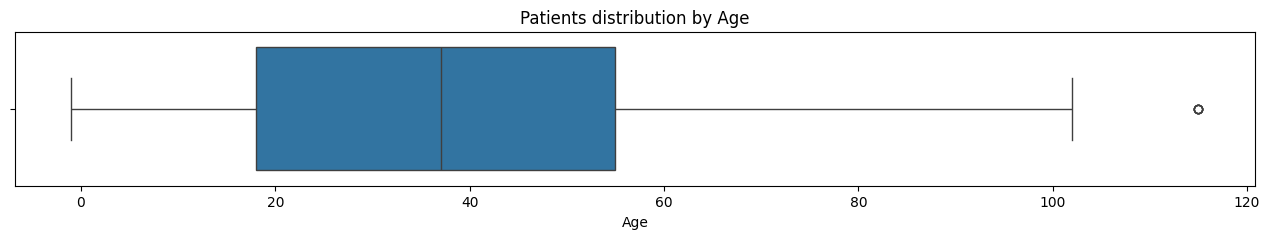

In [9]:
plt.figure(figsize=(16,2))
age = sns.boxplot(x=df.Age)
age.set_title("Patients distribution by Age")
plt.show()

It is found that the outliers are -1 and 115. So, the rows with them are removed from age. 

In [10]:
#remove rows with age greater than 102(outliers)
df = df.drop(df[df.Age > 102].index)

#remove rows with age less than 0(nonsense)
df = df.drop(df[df.Age <0].index)

In [11]:
#check the values of age again, it is found that there is no -1 and 115. 
df['Age'].unique()

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 100,  99])

In [12]:
#check the unique value of handcap
df['Handcap'].unique()

array([0, 1, 2, 3, 4])

Check the values of Handcap which are found to be 0 to 4. So, it is converted to 0 or 1, meaning the absence or presence of handcap.  

In [13]:
df['Handcap'] = df['Handcap'].apply(lambda x: 1 if x > 0 else 0)
df

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,2.572130e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596270e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557660e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213490e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [14]:
#check the values of handcap again, it is found to be 0 and 1
df['Handcap'].unique()

array([0, 1])

In [15]:
#check the data types
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

The name of columns 'Hipertension' and 'Handcap' are changed into 'Hypertension' and 'Handicap'

In [16]:
df = df.rename(columns={'Hipertension': 'Hypertension'})
df = df.rename(columns={'Handcap': 'Handicap'})


### convert data type

Some data types are corrected as follows.

In [17]:
df["Neighbourhood"] = df["Neighbourhood"].astype("category")
df['Scholarship'] = df['Scholarship'].astype(bool)
df['Hypertension'] = df['Hypertension'].astype(bool)
df['Diabetes'] = df['Diabetes'].astype(bool)
df['Alcoholism'] = df['Alcoholism'].astype(bool)
df['Handicap'] = df['Handicap'].astype(bool)
df['SMS_received'] = df['SMS_received'].astype(bool)

df.dtypes

PatientId          float64
AppointmentID        int64
Gender              object
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship           bool
Hypertension          bool
Diabetes              bool
Alcoholism            bool
Handicap              bool
SMS_received          bool
No-show             object
dtype: object

In [18]:
df['Gender'].unique()

array(['F', 'M'], dtype=object)

In [19]:
#check the data type again
df.dtypes

PatientId          float64
AppointmentID        int64
Gender              object
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship           bool
Hypertension          bool
Diabetes              bool
Alcoholism            bool
Handicap              bool
SMS_received          bool
No-show             object
dtype: object

A new age group column is created from age in which its numerical values are grouped into 5 classes according to the age classification recommended by WHO. 

Reference:<br>
United Nations. Provisional Guidelines On Standard International Age Classification. New York: UN;  [date unknown]. Series M No.74.

In [20]:
# Define age bins and corresponding labels for Medium Level classification
bins = [-1, 14, 24, 44, 64, 105]
labels = ['under 15', '15-24', '25-44', '45-64', '65+']

# Apply the binning and labeling to the 'Age' column
df['age_group'] = pd.cut(df['Age'], bins=bins, labels=labels)

# Display the first few rows to check the result
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show,age_group
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,False,True,False,False,False,False,No,45-64
1,5.589980e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,False,False,False,False,False,No,45-64
2,4.262960e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,False,False,False,False,False,False,No,45-64
3,8.679510e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,False,False,False,False,False,False,No,under 15
4,8.841190e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,False,True,True,False,False,False,No,45-64


In [21]:
df.dtypes

PatientId          float64
AppointmentID        int64
Gender              object
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship           bool
Hypertension          bool
Diabetes              bool
Alcoholism            bool
Handicap              bool
SMS_received          bool
No-show             object
age_group         category
dtype: object

Thus, most of the data types of columns are corrected. Schedule Day and Appointment Day are not so useful in data analysis  and model training. So, their types are left as object.

# Univariate Analysis - Categorical Features


What is the Distribution of Neighbourhood and age_group ?


Value counts for Neighbourhood:
Neighbourhood
JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: count, Length: 81, dtype: int64


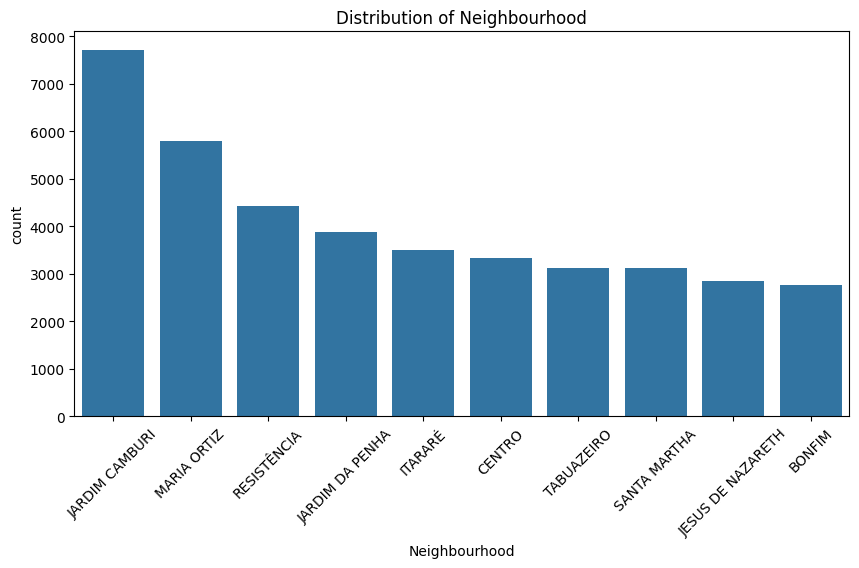


Value counts for age_group:
age_group
45-64       29992
25-44       28865
under 15    23257
65+         14397
15-24       14010
Name: count, dtype: int64


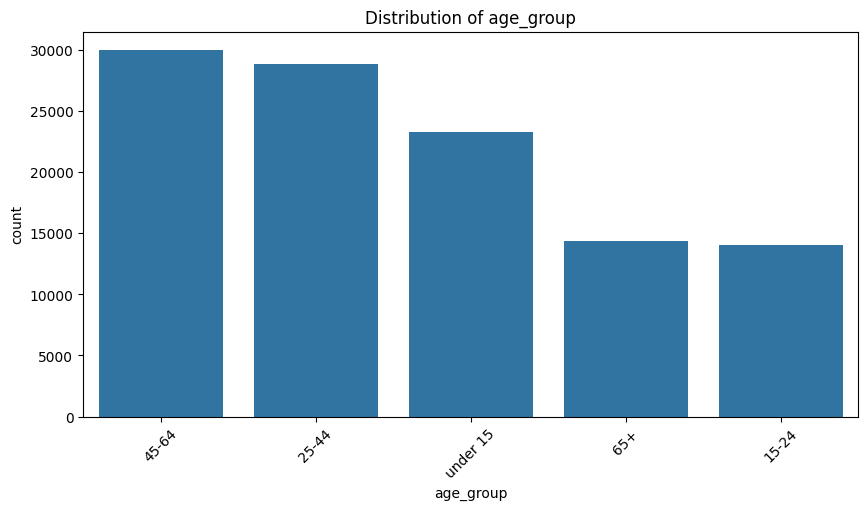

In [22]:
categorical_cols = df.select_dtypes(include=['category']).columns
for col in categorical_cols:
    # Get the value counts for the column
    value_counts = df[col].value_counts()
    print(f"\nValue counts for {col}:")
    print(value_counts)
    
    # Plot the value counts, limiting to the top 10 categories for faster plotting
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df, order=value_counts.index[:10])
    plt.title(f"Distribution of {col}")
    plt.xticks(rotation=45)
    plt.show(block=False)
    plt.pause(0.1)
    plt.close()

# Univariate Analysis - Numerical Features

### What is the Distribution of Age ?

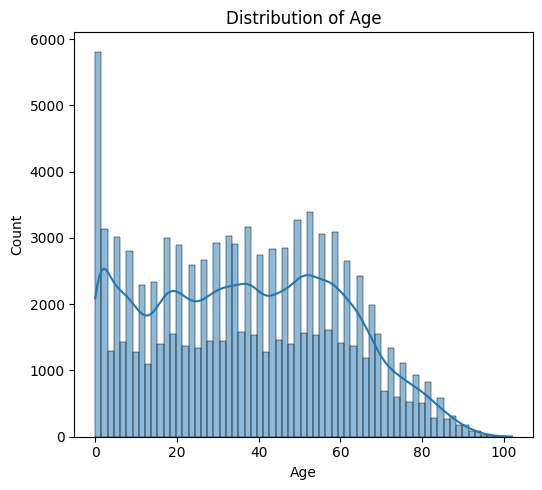

In [23]:
# Select numerical columns from the DataFrame
numerical_cols = df.select_dtypes(include=['int64']).columns

# List of columns to exclude from plotting
exclude_cols = ['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show',
       'age_group']

# Filter out the columns you want to exclude
filtered_numerical_cols = [col for col in numerical_cols if col not in exclude_cols]

# Set up the figure for subplots
num_plots = len(filtered_numerical_cols)
cols = 3  # Number of columns for the subplot grid
rows = math.ceil(num_plots / cols)  # Calculate the number of rows needed

fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()  # Flatten the axes array for easy indexing

# Iterate through each filtered numerical column and plot
for i, col in enumerate(filtered_numerical_cols):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


# Bivariate Analysis - Target vs Features


###What is the relation between No show with other feature like 'Gender', 'age_group', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received' ? 

Feature: Gender, Unique values: ['F', 'M']
Categories (2, object): ['F', 'M']
Target: No-show, Unique values: ['No' 'Yes']


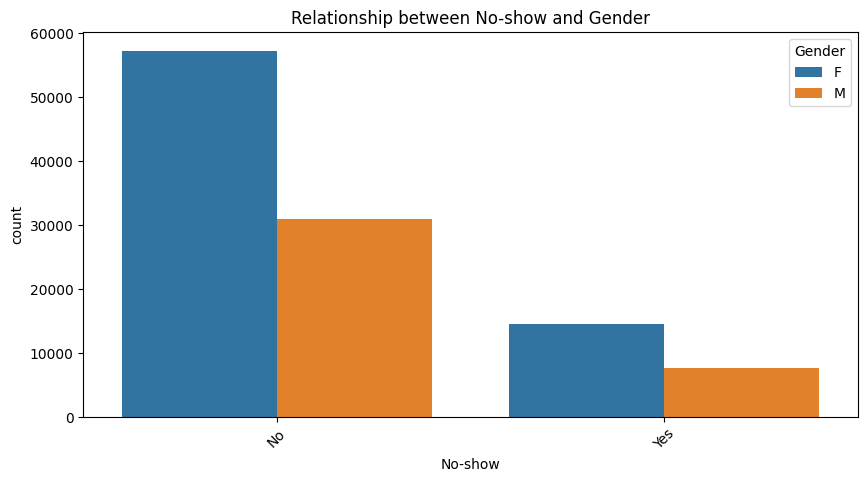

Feature: age_group, Unique values: ['45-64', 'under 15', '65+', '15-24', '25-44']
Categories (5, object): ['under 15' < '15-24' < '25-44' < '45-64' < '65+']
Target: No-show, Unique values: ['No' 'Yes']


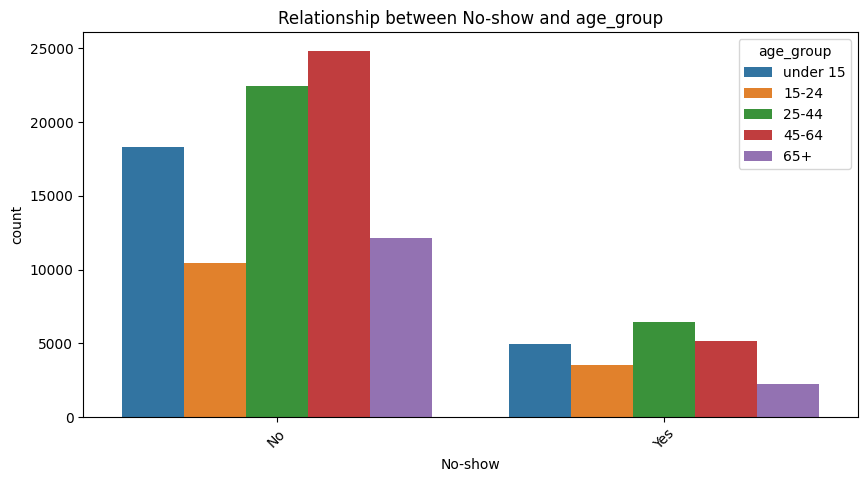

Feature: Scholarship, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: ['No' 'Yes']


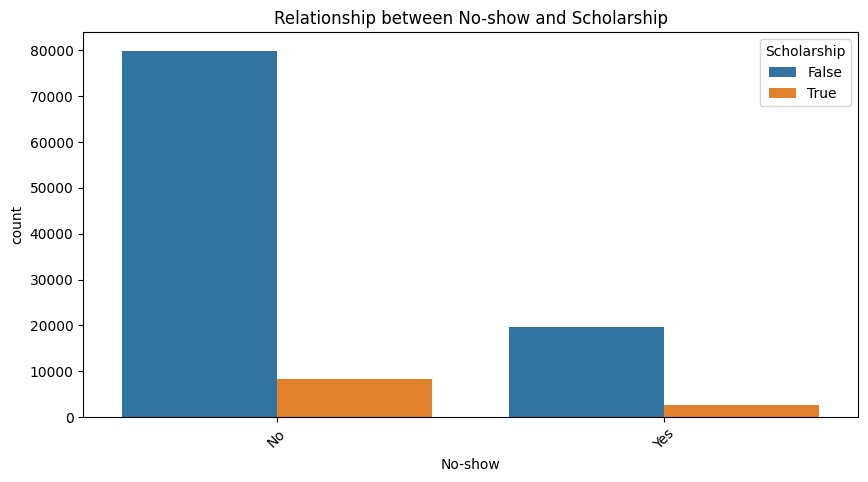

Feature: Hypertension, Unique values: [True, False]
Categories (2, bool): [False, True]
Target: No-show, Unique values: ['No' 'Yes']


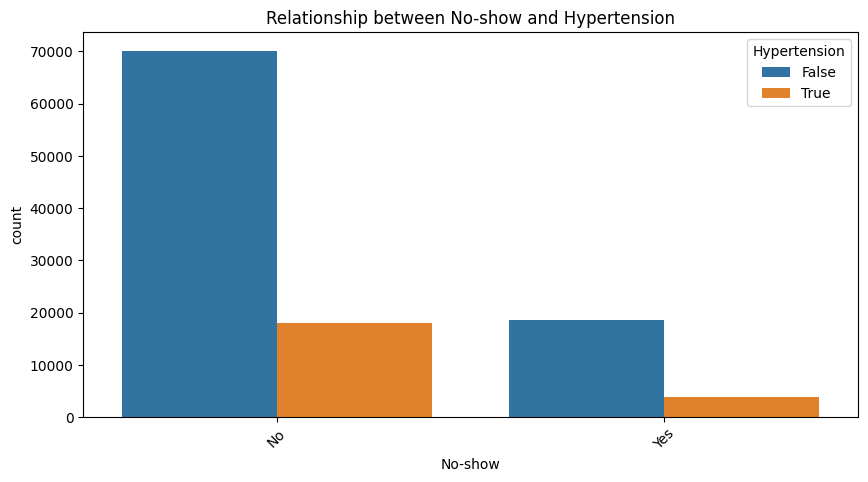

Feature: Diabetes, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: ['No' 'Yes']


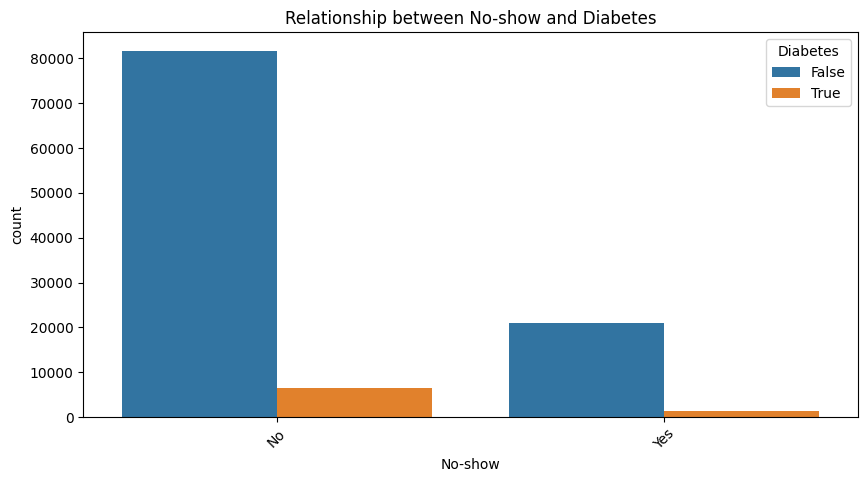

Feature: Alcoholism, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: ['No' 'Yes']


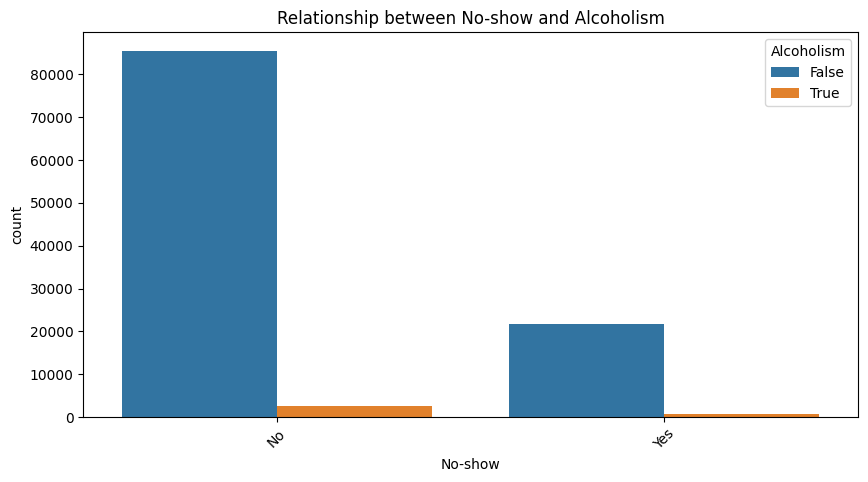

Feature: Handicap, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: ['No' 'Yes']


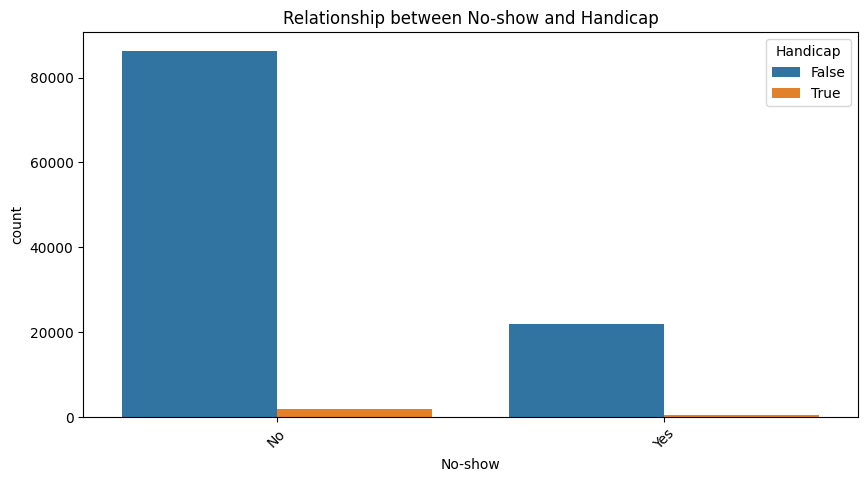

Feature: SMS_received, Unique values: [False, True]
Categories (2, bool): [False, True]
Target: No-show, Unique values: ['No' 'Yes']


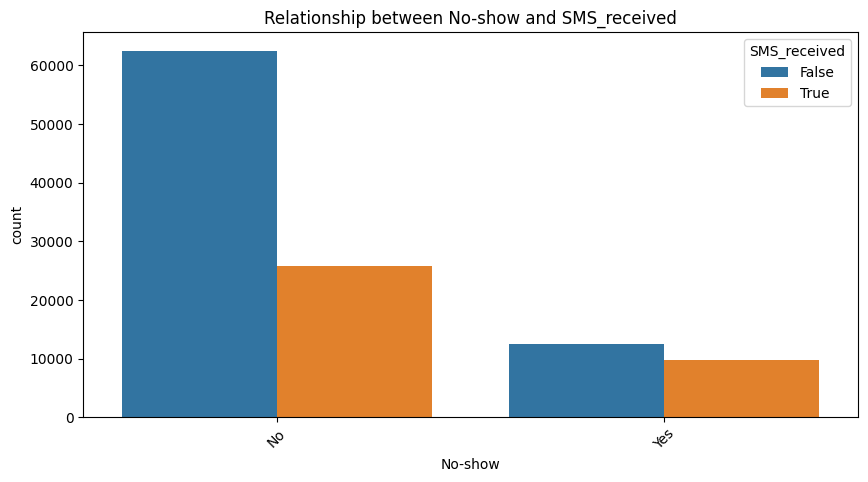

In [24]:
if 'No-show' in df.columns:
    target = 'No-show'
    features = ['Gender', 'age_group', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

    # Convert features to categorical where necessary
    for col in features:
        if col in df.columns:
            df[col] = df[col].astype('category')
    
    # Iterate through each feature
    for col in features:
        if col in df.columns:
            # Print unique values for each feature to check for issues
            print(f"Feature: {col}, Unique values: {df[col].unique()}")
            print(f"Target: {target}, Unique values: {df[target].unique()}")

            # Drop rows with NaN values in target and feature columns
            df_subset = df.dropna(subset=[target, col])

            # Proceed to plot only if data is available
            if not df_subset.empty:
                plt.figure(figsize=(10, 5))
                sns.countplot(x=target, hue=col, data=df_subset)  # Removed order to check the actual categories
                plt.title(f"Relationship between No-show and {col}")
                plt.xticks(rotation=45)
                plt.show()

Data types of some columns are converted in above analysis and so their data types are checked again.

In [25]:
df.dtypes

PatientId          float64
AppointmentID        int64
Gender            category
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship       category
Hypertension      category
Diabetes          category
Alcoholism        category
Handicap          category
SMS_received      category
No-show             object
age_group         category
dtype: object

Some data types of some columns are encoded using label encoder for correlation matrix calculation.

In [26]:
# Define categorical columns, including 'No-show'
categorical_cols = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received']

# Label encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        # Only apply encoding if the column is not numeric
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            df[col] = le.fit_transform(df[col])

# Select all numerical columns, including encoded categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'bool', 'float64']).columns

In [27]:
df.dtypes

PatientId          float64
AppointmentID        int64
Gender               int64
ScheduledDay        object
AppointmentDay      object
Age                  int64
Neighbourhood     category
Scholarship          int64
Hypertension         int64
Diabetes             int64
Alcoholism           int64
Handicap             int64
SMS_received         int64
No-show             object
age_group         category
dtype: object

# Correlation Matrix for Numerical Features


0    0
1    0
2    0
3    0
4    0
Name: No-show, dtype: int64


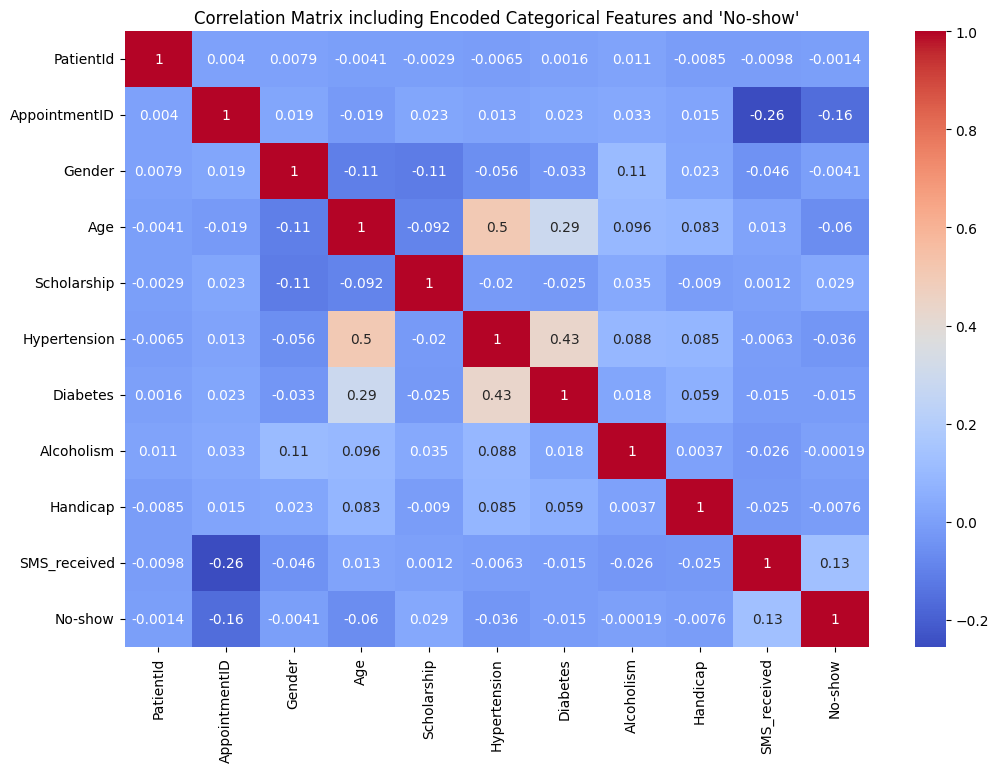

In [28]:
# Define categorical columns, including 'No-show'
categorical_cols = ['Gender', 'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No-show']

# Label encode categorical columns
le = LabelEncoder()
for col in categorical_cols:
    if col in df.columns:
        # Only apply encoding if the column is not numeric
        if df[col].dtype == 'object' or df[col].dtype.name == 'category':
            df[col] = le.fit_transform(df[col])

# Explicitly check if 'No-show' is correctly encoded
print(df['No-show'].head())  # Check first few values to verify encoding

# Select all numerical columns, including encoded categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'bool', 'float64']).columns

# Make sure 'No-show' is in the numerical columns list
if 'No-show' not in numerical_cols:
    numerical_cols = numerical_cols.append(pd.Index(['No-show']))

# Correlation Matrix for Numerical Features including encoded categorical columns and 'No-show'
plt.figure(figsize=(12, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix including Encoded Categorical Features and 'No-show'")
plt.show()


## Feature Engineering

Some features that would be used for model training are checked and processed to be ready for the training. 

So, the data types of features are appropiate. So, they are selected as features for ML training.

### Select features for ML model training

In [29]:
X = df[['Gender','age_group','Scholarship','Hypertension','Diabetes','Alcoholism','Handicap','SMS_received']]

Age group have 5 categories which are ordered so it needs ordinal encoding. Other features are binary having 2 values, 0 or 1. 

In [30]:
#check the values of age group
X['age_group'].unique()

['45-64', 'under 15', '65+', '15-24', '25-44']
Categories (5, object): ['under 15' < '15-24' < '25-44' < '45-64' < '65+']

In [31]:
# Indicate that the column is an ordered categorical feature
categ = ["under 15","15-24","25-44", "45-64","65+"]
X["age_group"] = pd.Categorical(X["age_group"], categories=categ, ordered=True)
# Get the factors and replace with catgory of age group with ordinal codes
labels, unique = pd.factorize(X["age_group"], sort=True)
print(labels, unique)
X["age_group"] = labels
X

[3 3 3 ... 1 2 3] CategoricalIndex(['under 15', '15-24', '25-44', '45-64', '65+'], categories=['under 15', '15-24', '25-44', '45-64', '65+'], ordered=True, dtype='category')


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9868\2905821431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age_group"] = pd.Categorical(X["age_group"], categories=categ, ordered=True)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9868\2905821431.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["age_group"] = labels


,Gender,age_group,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
0,0,3,0,1,0,0,0,0
1,1,3,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0
4,0,3,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...
110522,0,3,0,0,0,0,0,1
110523,0,3,0,0,0,0,0,1
110524,0,1,0,0,0,0,0,1
110525,0,2,0,0,0,0,0,1


### select target for model training

In [32]:
# select no show as target variable 
y = df['No-show']
y.shape

(110521,)

Check the target has class imbalance or not

In [33]:
#check the class imbalance
class_counts = y.value_counts()
class_percentages = y.value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percentages)

Class Counts:
 No-show
0    88205
1    22316
Name: count, dtype: int64

Class Percentages:
 No-show
0    79.808362
1    20.191638
Name: proportion, dtype: float64


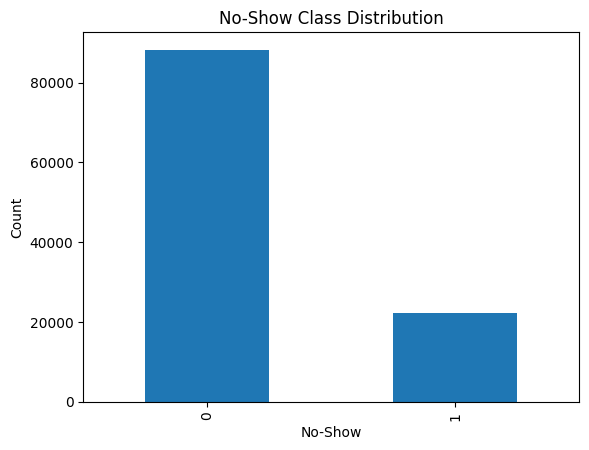

In [34]:
#visualize the class imbalance
class_counts.plot(kind='bar')
plt.title("No-Show Class Distribution")
plt.xlabel("No-Show")
plt.ylabel("Count")
plt.show()

So, it shows that no-show presence (1) has only 20 %, and there is class imbalance. To handle the class imbalance, SMOTETomek (Synthetic Minority Over-sampling Technique with Tomek Links ) will be used after spliting the data in following steps.

SMOTE is popular method to handle imbalanced data in which it creates synthetic data for minority class. It generates a new data point randomly in a position between original data and its nearest neighbours. By this way, it creates  data without duplicating existing ones. 

SMOTETomek contains 2 steps: first, SMOTE (Synthetic Minority Over-sampling Technique) generates synthetic examples for the minority class and then Tomek Links is applied to clean up the data, removing noises and overlap from majority classes to achieve better balanced data. 

Reference:<br>
1. Chawla NV, Bowyer KW, Hall LO, Kegelmeyer WP. SMOTE: Synthetic Minority Over-sampling Technique. J Artif Intell Res. 2002;16:321-57. doi: 10.1613/jair.953.
2. Aurelius R. Imbalanced Classification in Python: SMOTE-Tomek Links Method[Inernet]. Medium; 2021. [cited 2024 Nov 4]. Available from: https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc


By this way, we achieve a set of features and target that are in appropiate data types, forms and shape, necessary for ML model training.

## Machine Learning Model Development

Dataset is split into training and testing set. Each class imbalance handling method will be applied to the training data. Several classification models will be trained on training data and its performance will be measured on testing data. After comparing the performance metrics, about 5 classficiation models will be chosen.

Verify scikit-learn Installation

In [35]:
!pip install -U scikit-learn


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Import the necessary ML modules and libraries 

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
print("Imports successful")

Imports successful


The dataset of features and target is split into training set (80%) and target set(20%)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape
X_test.shape
print(X_test.shape, X_train.shape)
print(y_test.shape, y_train.shape)

(22105, 8) (88416, 8)
(22105,) (88416,)


In [38]:
#import necessary library for SMOTE
!pip install imblearn


[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Create performance metrics dataframe to store the metrics of trained models. <br> A function for both training and testing is executed, so that the ML models can be trained easily.

In [39]:
# Initialize an empty dataframe to store the performance metrics
performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

In [40]:
#write a function to train a ML model and test the performance, add the performance metrics into the performance_df dataframe
def evaluate_model(model_name, model, X_train, X_test, y_train, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')  # 'weighted' for handling imbalanced classes
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
  
    
    # Append the results to the performance dataframe
    performance_df.loc[len(performance_df)] = [model_name, accuracy, precision, recall, f1]
    return performance_df

Then, 11 ML models (some have 2 variants): Logistic Regression, Decision Trees, Random Forest, KNN, Gradient Boosting, Bagging, Adaboost, and Neural work are trained on the training set and their performance metrics are measured on testing data. Then, the metrics are compared. These models are usually used to predict no-shows of healthcare appointments in previous studies. 

Reference:
1. Salazar LHA, Parreira WD, Fernandes AMdR, Leithardt VRQ. No-show in medical appointments with machine learning techniques: A systematic literature review. Information. 2022;13(11):507. doi:10.3390/info1311050
2. Salazar LHA, Leithardt VRQ, Parreira WD, da Rocha Fernandes AM, Barbosa JLV, Correia SD. Application of machine learning techniques to predict a patient’s no-show in the healthcare sector. Future Internet. 2022;14(1):3. doi:10.3390/fi14010003
3. Fan G, Deng Z, Ye Q, Wang B. Machine learning-based prediction models for patients no-show in online outpatient appointments. Data Sci Manag. 2021;2:45-52. doi:10.1016/j.dsm.2021.06.002.


#### SMOTETomek method

Before training, SMOTETmoek method will be applied to the training data. It uses SMOTE to create synthetic data for minority class and then, remove noises and overlaps from the majority to achieve better balanced data.

In [41]:
#split the data set into training and testing again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=42)

Then, SMOTETomek method  will be applied to the training data to handle class imbalance.It is not applied to testing set to keep it realistic, and original as imbalanced data so that the models can reflect on its actual performance on real world new unseen data as original data.

Class Counts:
 No-show
0    70544
1    56435
Name: count, dtype: int64

Class Percentages:
 No-show
0    55.555643
1    44.444357
Name: proportion, dtype: float64


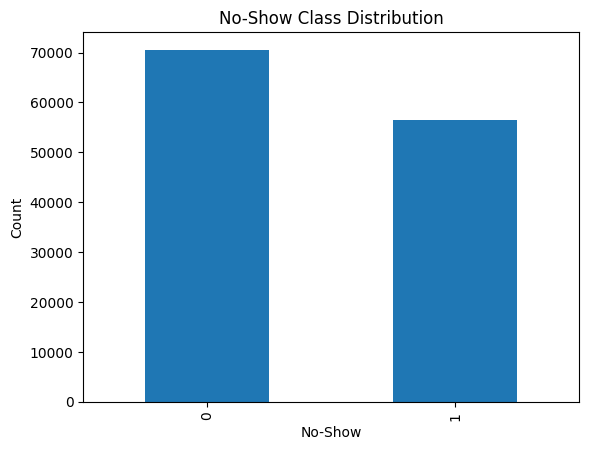

In [42]:
from imblearn.combine import SMOTETomek

smote_tomek = SMOTETomek(sampling_strategy=0.8, random_state=42)
X_train, y_train = smote_tomek.fit_resample(X_train, y_train)

#check the class imbalance in training data again
class_counts = y_train.value_counts()
class_percentages = y_train.value_counts(normalize=True) * 100

print("Class Counts:\n", class_counts)
print("\nClass Percentages:\n", class_percentages)

#visualize the class imbalance
class_counts.plot(kind='bar')
plt.title("No-Show Class Distribution")
plt.xlabel("No-Show")
plt.ylabel("Count")
plt.show()


Then, the same ML models will be trained on the training data obtained from SMOTETomek method. The results of performance metrics of all models are stored in a dataframe for comparison.

In [43]:
#create a empty dataframe to store performance metrics
performance_df = pd.DataFrame(columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

#train the ML models using the function described above
log_reg_smt = LogisticRegression(max_iter=1000)
evaluate_model('Logistic Regression', log_reg_smt, X_train, X_test, y_train, y_test)

DT_gini_smt = DecisionTreeClassifier( criterion='gini',max_depth = 5)
evaluate_model('DT_gini', DT_gini_smt,X_train, X_test, y_train, y_test)

DT_entropy_smt = DecisionTreeClassifier( criterion='entropy', max_depth = 5)
evaluate_model('DT_entropy', DT_entropy_smt,X_train, X_test, y_train, y_test)

RF_gini_smt = RandomForestClassifier(n_estimators=30, criterion='gini', max_depth=5)
evaluate_model('RF_gini', RF_gini_smt, X_train, X_test, y_train, y_test)

RF_entropy_smt = RandomForestClassifier(n_estimators=30, criterion='entropy', max_depth=5)
evaluate_model('RF_entropy', RF_entropy_smt, X_train, X_test, y_train, y_test)

KNN_5neighbours_smt = KNeighborsClassifier(n_neighbors=5)
evaluate_model('KNN_5neighbours',KNN_5neighbours_smt, X_train, X_test, y_train, y_test)

KNN_3neighbours_smt = KNeighborsClassifier(n_neighbors=3)
evaluate_model('KNN_3neighbours',KNN_3neighbours_smt, X_train, X_test, y_train, y_test)

gradient_boosting_smt = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3)
evaluate_model('Gradient Boosting', gradient_boosting_smt, X_train, X_test, y_train, y_test)

bagging_smt = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50)
evaluate_model('Bagging', bagging_smt, X_train, X_test, y_train, y_test)

adaboost_smt = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1), n_estimators=50, learning_rate=1.0)
evaluate_model('Adaptive Boosting', adaboost_smt, X_train, X_test, y_train, y_test)

neural_network_smt = MLPClassifier(hidden_layer_sizes=(100,), max_iter=200, activation='relu', solver='adam')
evaluate_model('Neural Network', neural_network_smt, X_train, X_test, y_train, y_test)

c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


,Model,Accuracy,Precision,Recall,F1-Score
0,Logistic Regression,0.678127,0.721362,0.678127,0.696190
1,DT_gini,0.722054,0.722708,0.722054,0.722380
2,DT_entropy,0.722054,0.722708,0.722054,0.722380
3,RF_gini,0.724316,0.722124,0.724316,0.723208
4,RF_entropy,0.724949,0.722154,0.724949,0.723533
5,KNN_5neighbours,0.794933,0.704022,0.794933,0.714165
6,KNN_3neighbours,0.778240,0.710422,0.778240,0.727209
7,Gradient Boosting,0.721873,0.722948,0.721873,0.722408
8,Bagging,0.714092,0.721676,0.714092,0.717753
9,Adaptive Boosting,0.717485,0.722267,0.717485,0.719822


Among the ML models, 5 models are selected according to their performance results, and uses in previous studies. They are  Decision Tree (DT_gini), Random Forest (RF_entropy), K Nearest Neighbours (KNN 5 neighbours), Gradient Boosting and Neural Network. 

Then, fairness metrics of 8 used features will be calculated for these 5 models.

## Bias Identification

4 fairness metrics: Demographic Parity Difference, Equalized Odds Difference, Disparate Impact, Negative Rate Difference will be used. 
<br> These metrics will be measured for each feature for every model used to detect that this feature has bias on the particular model.
The first three metrics focus on positive prediction, and the last relates to negative predictions. Using all 4 metrics can provide a comprehensive evaluation of fairness capturing different aspects of bias in the features, ensuring a well-rounded assessment. 

Reference:
1. Fairlearn. Common fairness metrics[Internet]. Fairlearn; [date unknown]. [cited 2024 Nov 4]. Available from: https://fairlearn.org/main/user_guide/assessment/common_fairness_metrics.html
2. Ronaghan S. 	AI Fairness — Explanation of Disparate Impact Remover[Internet]. Medium; 2019. [cited 2024 Nov 4]. Available from: https://towardsdatascience.com/ai-fairness-explanation-of-disparate-impact-remover-ce0da59451f1
3. IBM Cloud Pak for Data. Watson OpenScale fairness metrics. IBM; [date unknown]. [ updated 2024 Aug 13, cited 2024 Nov 4]. Available from: https://dataplatform.cloud.ibm.com/docs/content/wsj/model/wos-fairness-metrics-ovr.html?context=cpdaas


first, the required libraries for fairness metrics will be installed

In [44]:
pip install fairlearn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [45]:
pip install aif360

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
pip install aif360[inFairness]

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: aif360[inFairness] in c:\users\lenovo\appdata\local\programs\python\python312\lib\site-packages (0.6.1)




[notice] A new release of pip is available: 24.1.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Import required modules

In [47]:
from fairlearn.metrics import demographic_parity_difference, equalized_odds_difference
from aif360.metrics import BinaryLabelDatasetMetric
from aif360.datasets import BinaryLabelDataset
from sklearn.metrics import accuracy_score, confusion_matrix

pip install 'aif360[AdversarialDebiasing]'
pip install 'aif360[AdversarialDebiasing]'
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\inFairness\utils\ndcg.py:37: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the `torch.func` migration guide for more details https://pytorch.org/docs/main/func.migrating.html
  vect_normalized_discounted_cumulative_gain = vmap(
c:\Users\Lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\inFairness\utils\ndcg.py:48: FutureWarning: We've integrated functorch into PyTorch. As the final step of the integration, `functorch.vmap` is deprecated as of PyTorch 2.0 and will be deleted in a future version of PyTorch >= 2.3. Please use `torch.vmap` instead; see the PyTorch 2.0 release notes and/or the

 Select a feature to test as demographic data and integrated into the dataframe <br> The dataframe has actual target(no-show), predicted target, and this feature as demographic.

In [121]:
#select a feature as demographic data
demographic_data = df['Gender']

Frist, Decision Tree will be used for fairness metrics calculation. 

In [122]:
#use the trained logistic regression model to predict all instances of the dataset
y_true = y
y_pred_all = DT_gini_smt.predict(X)

In [50]:
# Create a dataframe of predicted target, true target and the feature for demographic data
df_results = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred_all,
    'demographic': demographic_data
})


In [51]:
#check the dataframe
df_results.head()

,y_true,y_pred,demographic
0,0,0,0
1,0,0,1
2,0,0,0
3,0,0,0
4,0,0,0


In [52]:
# Compute accuracy overall
accuracy = accuracy_score(df_results['y_true'], df_results['y_pred'])
print("Overall accuracy:", accuracy)

Overall accuracy: 0.7245229413414646


### 2 Metrics Demographic Parity Difference, Equalized Odds Difference will be measured on that feature as follows.

In [53]:
# Fairness metrics: Demographic Parity and Equalized Odds
demographic_parity_diff = demographic_parity_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic'])
equalized_odds_diff = equalized_odds_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic'])

print(f"Demographic Parity Difference: {demographic_parity_diff}")
print(f"Equalized Odds Difference: {equalized_odds_diff}")


Demographic Parity Difference: 0.0164339238810442
Equalized Odds Difference: 0.03219451455090794


### Disparate Impact metrics is measured as follows.

In [54]:
# Additional bias metrics using AIF360
# Convert the dataframe to a BinaryLabelDataset object
dataset = BinaryLabelDataset(
    df=df_results,
    label_names=['y_true'],
    protected_attribute_names=['demographic']
)

# Compute metrics
metric = BinaryLabelDatasetMetric(dataset, privileged_groups=[{'demographic': 1}], unprivileged_groups=[{'demographic': 0}])

# Disparate impact
disparate_impact = metric.disparate_impact()
print(f"Disparate Impact: {disparate_impact}")

Disparate Impact: 1.017235651091653


### False Negative Rate Difference metrics is measured as follows.

In [55]:
# Calculate False Negative Rate (FNR) for privileged and unprivileged groups manually
# First, separate the privileged and unprivileged groups
privileged_group = df_results[df_results['demographic'] == 1]  # Assuming '1' represents privileged (e.g., Male)
unprivileged_group = df_results[df_results['demographic'] == 0]  # Assuming '0' represents unprivileged (e.g., Female)

# False Negative Rate (FNR) for Privileged Group
tn_priv, fp_priv, fn_priv, tp_priv = confusion_matrix(privileged_group['y_true'], privileged_group['y_pred']).ravel()
fnr_privileged = fn_priv / (fn_priv + tp_priv) if (fn_priv + tp_priv) > 0 else 0

# False Negative Rate (FNR) for Unprivileged Group
tn_unpriv, fp_unpriv, fn_unpriv, tp_unpriv = confusion_matrix(unprivileged_group['y_true'], unprivileged_group['y_pred']).ravel()
fnr_unprivileged = fn_unpriv / (fn_unpriv + tp_unpriv) if (fn_unpriv + tp_unpriv) > 0 else 0

# Difference in False Negative Rates
fnr_difference = fnr_privileged - fnr_unprivileged

print(f"False Negative Rate for Privileged Group: {fnr_privileged}")
print(f"False Negative Rate for Unprivileged Group: {fnr_unprivileged}")
print(f"False Negative Rate Difference: {fnr_difference}")

False Negative Rate for Privileged Group: 0.7080906148867314
False Negative Rate for Unprivileged Group: 0.6758961003358235
False Negative Rate Difference: 0.03219451455090794


According to the results of 4 metrics, the feature 'Gender' has no bias on the model

A function is structured and executed to calculate these 4 metrics on each feature easily.

In [56]:
def calculate_bias(y_true, y_pred, demographic_data):
    df_results = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred,
    'demographic': demographic_data
    })
    accuracy = accuracy_score(df_results['y_true'], df_results['y_pred'])
    print("Overall accuracy:", accuracy)
    demographic_parity_diff = demographic_parity_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic'])
    equalized_odds_diff = equalized_odds_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic'])

    print(f"Demographic Parity Difference: {demographic_parity_diff}")
    print(f"Equalized Odds Difference: {equalized_odds_diff}")

    # Additional bias metrics using AIF360
    # Convert the dataframe to a BinaryLabelDataset object
    dataset = BinaryLabelDataset(
    df=df_results,
    label_names=['y_true'],
    protected_attribute_names=['demographic']
    )

# Compute metrics
    metric = BinaryLabelDatasetMetric(dataset, privileged_groups=[{'demographic': 1}], unprivileged_groups=[{'demographic': 0}])

# Disparate impact
    disparate_impact = metric.disparate_impact()
    print(f"Disparate Impact: {disparate_impact}")

    # Calculate False Negative Rate (FNR) for privileged and unprivileged groups manually
    # First, separate the privileged and unprivileged groups
    privileged_group = df_results[df_results['demographic'] == 1]  # Assuming '1' represents privileged (e.g., Male)
    unprivileged_group = df_results[df_results['demographic'] == 0]  # Assuming '0' represents unprivileged (e.g., Female)

    # False Negative Rate (FNR) for Privileged Group
    tn_priv, fp_priv, fn_priv, tp_priv = confusion_matrix(privileged_group['y_true'], privileged_group['y_pred']).ravel()
    fnr_privileged = fn_priv / (fn_priv + tp_priv) if (fn_priv + tp_priv) > 0 else 0

    # False Negative Rate (FNR) for Unprivileged Group
    tn_unpriv, fp_unpriv, fn_unpriv, tp_unpriv = confusion_matrix(unprivileged_group['y_true'], unprivileged_group['y_pred']).ravel()
    fnr_unprivileged = fn_unpriv / (fn_unpriv + tp_unpriv) if (fn_unpriv + tp_unpriv) > 0 else 0

    # Difference in False Negative Rates
    fnr_difference = fnr_privileged - fnr_unprivileged

    print(f"False Negative Rate for Privileged Group: {fnr_privileged}")
    print(f"False Negative Rate for Unprivileged Group: {fnr_unprivileged}")
    print(f"False Negative Rate Difference: {fnr_difference}")

Then, each binary feature can be used to measure the 4 metrics at once using the function.

In [57]:
demographic_data = df['Gender']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.0164339238810442
Equalized Odds Difference: 0.03219451455090794
Disparate Impact: 1.017235651091653
False Negative Rate for Privileged Group: 0.7080906148867314
False Negative Rate for Unprivileged Group: 0.6758961003358235
False Negative Rate Difference: 0.03219451455090794


In [58]:
demographic_data = df['Scholarship']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.12348875320736485
Equalized Odds Difference: 0.1548958540747249
Disparate Impact: 0.8343901382621783
False Negative Rate for Privileged Group: 0.5500387897595035
False Negative Rate for Unprivileged Group: 0.7049346438342284
False Negative Rate Difference: -0.15489585407472495


In [59]:
demographic_data = df['Hypertension']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.16804437764855895
Equalized Odds Difference: 0.2518742502998801
Disparate Impact: 1.2079857187633238
False Negative Rate for Privileged Group: 0.8963414634146342
False Negative Rate for Unprivileged Group: 0.6444672131147541
False Negative Rate Difference: 0.2518742502998801


In [60]:
demographic_data = df['Diabetes']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.15967592896890787
Equalized Odds Difference: 0.24846100944923122
Disparate Impact: 1.1309660586445083
False Negative Rate for Privileged Group: 0.9195804195804196
False Negative Rate for Unprivileged Group: 0.6711194101311884
False Negative Rate Difference: 0.24846100944923122


In [61]:
demographic_data = df['Alcoholism']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.014791495306794716
Equalized Odds Difference: 0.04893893711658942
Disparate Impact: 1.0021922452249095
False Negative Rate for Privileged Group: 0.6395864106351551
False Negative Rate for Unprivileged Group: 0.6885253477517446
False Negative Rate Difference: -0.048938937116589476


In [62]:
demographic_data = df['Handicap']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.12787867619490376
Equalized Odds Difference: 0.19268523237865953
Disparate Impact: 1.1204754567289317
False Negative Rate for Privileged Group: 0.8762376237623762
False Negative Rate for Unprivileged Group: 0.6835523913837167
False Negative Rate Difference: 0.19268523237865953


In [63]:
demographic_data = df['SMS_received']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.6228122093514838
Equalized Odds Difference: 0.713818479149632
Disparate Impact: 0.6056294260940362
False Negative Rate for Privileged Group: 0.28618152085036797
False Negative Rate for Unprivileged Group: 1.0
False Negative Rate Difference: -0.713818479149632


However for the age_group, it is not binary, and it is ordnial feature having 5 categories. So, ordinal encoding of age group needs to be done to measure the metrics.

In [64]:
#check the values of age_group
print("Unique age_group values:", df['age_group'].unique())


Unique age_group values: ['45-64', 'under 15', '65+', '15-24', '25-44']
Categories (5, object): ['under 15' < '15-24' < '25-44' < '45-64' < '65+']


In [123]:
#create a dataframe with age group
demographic_data = df['age_group']
df_results = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred_all,
    'demographic_age_group': demographic_data
})

In [124]:
#check the dataframe containing age group
df_results

,y_true,y_pred,demographic_age_group
0,0,0,45-64
1,0,0,45-64
2,0,0,45-64
3,0,0,under 15
4,0,0,45-64
...,...,...,...
110522,0,0,45-64
110523,0,0,45-64
110524,0,1,15-24
110525,0,1,25-44


Ordinal encoding is done to the age_group required for the calculation of fairness metrics.

In [125]:
# Indicate that the column is an ordered categorical feature
categ = ['under 15', '15-24', '25-44', '45-64', '65+']
df_results['demographic_age_group'] = pd.Categorical(df_results['demographic_age_group'], categories=categ, ordered=True)
print(df_results.dtypes)

y_true                      int64
y_pred                      int64
demographic_age_group    category
dtype: object


In [126]:
#encode the age group according to the order of categories
labels, unique = pd.factorize(df_results["demographic_age_group"], sort=True)
print(labels, unique)

[3 3 3 ... 1 2 3] CategoricalIndex(['under 15', '15-24', '25-44', '45-64', '65+'], categories=['under 15', '15-24', '25-44', '45-64', '65+'], ordered=True, dtype='category')


In [127]:
#store the encoding results into the demographic age group column and view the dataframe again to check the result
df_results["demographic_age_group"] = labels
df_results

,y_true,y_pred,demographic_age_group
0,0,0,3
1,0,0,3
2,0,0,3
3,0,0,0
4,0,0,3
...,...,...,...
110522,0,0,3
110523,0,0,3
110524,0,1,1
110525,0,1,2


By this way, apporpiate dataframe of age group as demographic data is obtained.

#### Calculate Demographic Parity Difference, Equalized Odds Difference for age group as follows. 

In [128]:
accuracy = accuracy_score(df_results['y_true'], df_results['y_pred'])
print("Overall accuracy:", accuracy)
demographic_parity_diff = demographic_parity_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic_age_group'])
equalized_odds_diff = equalized_odds_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic_age_group'])

print(f"Demographic Parity Difference: {demographic_parity_diff}")
print(f"Equalized Odds Difference: {equalized_odds_diff}")

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.3375714533171661
Equalized Odds Difference: 0.4740752205540938


To measure the Disparate Impact and False Negative Rate Difference, age group has 5 categories or subgroups. So, it is needed that one subgroup is selected as a reference group and the metrics of other 4 subgroups will be measured on this reference group. 

#### Calcuate the Disparate Impact

In [71]:
# Step 1: Calculate positive prediction rate for each age group
positive_rate_by_group = df_results[df_results['y_pred'] == 1].groupby('demographic_age_group').size() / df_results.groupby('demographic_age_group').size()

# Step 2: Choose the reference group (group with the highest positive outcome rate)
reference_group = positive_rate_by_group.idxmax()
reference_rate = positive_rate_by_group[reference_group]

# Step 3: Calculate disparate impact for each group relative to the reference group
disparate_impact_ratios = positive_rate_by_group / reference_rate

# Display the results
print("Positive prediction rates by age group:")
print(positive_rate_by_group)
print(f"\nReference group: {reference_group} with rate {reference_rate}")
print("\nDisparate Impact Ratios relative to the reference group:")
print(disparate_impact_ratios)

Positive prediction rates by age group:
demographic_age_group
0    0.293675
1    0.321770
2    0.337571
3    0.033876
4         NaN
dtype: float64

Reference group: 2 with rate 0.3375714533171661

Disparate Impact Ratios relative to the reference group:
demographic_age_group
0    0.869964
1    0.953191
2    1.000000
3    0.100351
4         NaN
dtype: float64


The last age group has no positive prediction. So, its  positive prediction rate become 0 and disparate impact ratio is also 0, which is interpreted as NaN by python. It can be considered as 0 (zero).

#### Calcuate the False Negative Rate Difference

In [72]:
# Step 1: Calculate false negative rate for each age group
fnr_by_group = (
    df_results[(df_results['y_true'] == 1) & (df_results['y_pred'] == 0)].groupby('demographic_age_group').size() / 
    df_results[df_results['y_true'] == 1].groupby('demographic_age_group').size()
).fillna(0)  # Fill NaN for groups with no positive cases

# Step 2: Choose the reference group (group with the lowest FNR)
reference_group = fnr_by_group.idxmin()
reference_fnr = fnr_by_group[reference_group]

# Step 3: Calculate FNR difference relative to the reference group
fnr_difference = fnr_by_group - reference_fnr

# Display the results
print("False Negative Rates by age group:")
print(fnr_by_group)
print(f"\nReference group: {reference_group} with FNR {reference_fnr}")
print("\nFalse Negative Rate Differences relative to the reference group:")
print(fnr_difference)


False Negative Rates by age group:
demographic_age_group
0    0.591149
1    0.537571
2    0.525925
3    0.947664
4    1.000000
dtype: float64

Reference group: 2 with FNR 0.5259247794459062

False Negative Rate Differences relative to the reference group:
demographic_age_group
0    0.065224
1    0.011646
2    0.000000
3    0.421739
4    0.474075
dtype: float64


#### A function will be created to calcuate all 4 metrics of age group

In [73]:
#A function will be created to calcuate all fairness metrics of age_group column in just one cell
def age_group_fairness_metrics(y_true,y_pred,demographic_data):
    df_results = pd.DataFrame({
    'y_true': y_true,
    'y_pred': y_pred,
    'demographic_age_group': demographic_data
    })
    categ = ['under 15', '15-24', '25-44', '45-64', '65+']
    df_results['demographic_age_group'] = pd.Categorical(df_results['demographic_age_group'], categories=categ, ordered=True)
    labels, unique = pd.factorize(df_results["demographic_age_group"], sort=True)
    df_results["demographic_age_group"] = labels
    accuracy = accuracy_score(df_results['y_true'], df_results['y_pred'])
    print("Overall accuracy:", accuracy)

    #CALCULATE DEMOGRAPHIC PARITY DIFFERENCE AND EQUALIZED ODDS DIFFERENCE
    demographic_parity_diff = demographic_parity_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic_age_group'])
    equalized_odds_diff = equalized_odds_difference(df_results['y_true'], df_results['y_pred'], sensitive_features=df_results['demographic_age_group'])

    print(f"Demographic Parity Difference: {demographic_parity_diff}")
    print(f"Equalized Odds Difference: {equalized_odds_diff}")
    print('-------------------------')
    #CALCULATE DISPARATE IMPACT
    # Step 1: Calculate positive prediction rate for each age group
    positive_rate_by_group = df_results[df_results['y_pred'] == 1].groupby('demographic_age_group').size() / df_results.groupby('demographic_age_group').size()

    # Step 2: Choose the reference group (group with the highest positive outcome rate)
    reference_group = positive_rate_by_group.idxmax()
    reference_rate = positive_rate_by_group[reference_group]

    # Step 3: Calculate disparate impact for each group relative to the reference group
    disparate_impact_ratios = positive_rate_by_group / reference_rate

    # Display the results
    print('DISPARATE IMPACT')
    print("Positive prediction rates by age group:")
    print(positive_rate_by_group)
    print(f"\nReference group: {reference_group} with rate {reference_rate}")
    print("\nDisparate Impact Ratios relative to the reference group:") 
    print(disparate_impact_ratios)
    print('-------------------------')

    #CALCULATE FALSE NEGATIVE RATE DIFFERENCE
    # Step 1: Calculate false negative rate for each age group
    fnr_by_group = (
        df_results[(df_results['y_true'] == 1) & (df_results['y_pred'] == 0)].groupby('demographic_age_group').size() / 
        df_results[df_results['y_true'] == 1].groupby('demographic_age_group').size()
        ).fillna(0)  # Fill NaN for groups with no positive cases

    # Step 2: Choose the reference group (group with the lowest FNR)
    reference_group = fnr_by_group.idxmin()
    reference_fnr = fnr_by_group[reference_group]

    # Step 3: Calculate FNR difference relative to the reference group
    fnr_difference = fnr_by_group - reference_fnr

    # Display the results
    print('FALSE NEGATIVE RATE DIFFERENCE')
    print("False Negative Rates by age group:")
    print(fnr_by_group)
    print(f"\nReference group: {reference_group} with FNR {reference_fnr}")
    print("\nFalse Negative Rate Differences relative to the reference group:")
    print(fnr_difference)
    print('-------------------------')


By this way, 4 fairness metrics for age group feature can be calculated at once using the function.

In [74]:
#calcuate the metrics of age group using the function
demographic_data = df['age_group']
age_group_fairness_metrics(y_true,y_pred_all,demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.3375714533171661
Equalized Odds Difference: 0.4740752205540938
-------------------------
DISPARATE IMPACT
Positive prediction rates by age group:
demographic_age_group
0    0.293675
1    0.321770
2    0.337571
3    0.033876
4         NaN
dtype: float64

Reference group: 2 with rate 0.3375714533171661

Disparate Impact Ratios relative to the reference group:
demographic_age_group
0    0.869964
1    0.953191
2    1.000000
3    0.100351
4         NaN
dtype: float64
-------------------------
FALSE NEGATIVE RATE DIFFERENCE
False Negative Rates by age group:
demographic_age_group
0    0.591149
1    0.537571
2    0.525925
3    0.947664
4    1.000000
dtype: float64

Reference group: 2 with FNR 0.5259247794459062

False Negative Rate Differences relative to the reference group:
demographic_age_group
0    0.065224
1    0.011646
2    0.000000
3    0.421739
4    0.474075
dtype: float64
-------------------------


By this way, it can be seen how to calculate the fairness metrics step by step. From now, the fairness metrics of all 8 features for all 5 ML models: Logistic regression, Decision Tree (DT_gini), Random Forest (RF_entropy), K Nearest Neighbour(KNN 5neighbours) and Neural Network will be calculated as follows. 

#### Decision Tree

Now, fairness metrics of features for the Decision Tree Model will be calculated using the functions. Although it is seen above, it will be calcuated again for better understanding and comparison.

In [75]:
y_true = y
y_pred_all = DT_gini_smt.predict(X)

In [76]:
demographic_data = df['Gender']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.0164339238810442
Equalized Odds Difference: 0.03219451455090794
Disparate Impact: 1.017235651091653
False Negative Rate for Privileged Group: 0.7080906148867314
False Negative Rate for Unprivileged Group: 0.6758961003358235
False Negative Rate Difference: 0.03219451455090794


In [77]:
demographic_data = df['Scholarship']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.12348875320736485
Equalized Odds Difference: 0.1548958540747249
Disparate Impact: 0.8343901382621783
False Negative Rate for Privileged Group: 0.5500387897595035
False Negative Rate for Unprivileged Group: 0.7049346438342284
False Negative Rate Difference: -0.15489585407472495


In [78]:
demographic_data = df['Hypertension']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.16804437764855895
Equalized Odds Difference: 0.2518742502998801
Disparate Impact: 1.2079857187633238
False Negative Rate for Privileged Group: 0.8963414634146342
False Negative Rate for Unprivileged Group: 0.6444672131147541
False Negative Rate Difference: 0.2518742502998801


In [79]:
demographic_data = df['Diabetes']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.15967592896890787
Equalized Odds Difference: 0.24846100944923122
Disparate Impact: 1.1309660586445083
False Negative Rate for Privileged Group: 0.9195804195804196
False Negative Rate for Unprivileged Group: 0.6711194101311884
False Negative Rate Difference: 0.24846100944923122


In [80]:
demographic_data = df['Alcoholism']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.014791495306794716
Equalized Odds Difference: 0.04893893711658942
Disparate Impact: 1.0021922452249095
False Negative Rate for Privileged Group: 0.6395864106351551
False Negative Rate for Unprivileged Group: 0.6885253477517446
False Negative Rate Difference: -0.048938937116589476


In [81]:
demographic_data = df['Handicap']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.12787867619490376
Equalized Odds Difference: 0.19268523237865953
Disparate Impact: 1.1204754567289317
False Negative Rate for Privileged Group: 0.8762376237623762
False Negative Rate for Unprivileged Group: 0.6835523913837167
False Negative Rate Difference: 0.19268523237865953


In [82]:
demographic_data = df['SMS_received']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.6228122093514838
Equalized Odds Difference: 0.713818479149632
Disparate Impact: 0.6056294260940362
False Negative Rate for Privileged Group: 0.28618152085036797
False Negative Rate for Unprivileged Group: 1.0
False Negative Rate Difference: -0.713818479149632


In [83]:
demographic_data = df['age_group']
age_group_fairness_metrics(y_true,y_pred_all,demographic_data)

Overall accuracy: 0.7245229413414646
Demographic Parity Difference: 0.3375714533171661
Equalized Odds Difference: 0.4740752205540938
-------------------------
DISPARATE IMPACT
Positive prediction rates by age group:
demographic_age_group
0    0.293675
1    0.321770
2    0.337571
3    0.033876
4         NaN
dtype: float64

Reference group: 2 with rate 0.3375714533171661

Disparate Impact Ratios relative to the reference group:
demographic_age_group
0    0.869964
1    0.953191
2    1.000000
3    0.100351
4         NaN
dtype: float64
-------------------------
FALSE NEGATIVE RATE DIFFERENCE
False Negative Rates by age group:
demographic_age_group
0    0.591149
1    0.537571
2    0.525925
3    0.947664
4    1.000000
dtype: float64

Reference group: 2 with FNR 0.5259247794459062

False Negative Rate Differences relative to the reference group:
demographic_age_group
0    0.065224
1    0.011646
2    0.000000
3    0.421739
4    0.474075
dtype: float64
-------------------------


#### Random Forest

Now, fairness metrics of features for the Random Forest Model will be calculated using the functions.  

In [84]:
y_true = y
y_pred_all = RF_entropy_smt.predict(X)

In [85]:
demographic_data = df['Gender']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7279340577808743
Demographic Parity Difference: 0.020419565755976976
Equalized Odds Difference: 0.03621476110534072
Disparate Impact: 1.017235651091653
False Negative Rate for Privileged Group: 0.7189644012944983
False Negative Rate for Unprivileged Group: 0.6827496401891577
False Negative Rate Difference: 0.03621476110534061


In [86]:
demographic_data = df['Scholarship']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7279340577808743
Demographic Parity Difference: 0.10799016906076553
Equalized Odds Difference: 0.14228990937212316
Disparate Impact: 0.8343901382621783
False Negative Rate for Privileged Group: 0.5694336695112491
False Negative Rate for Unprivileged Group: 0.7117235788833721
False Negative Rate Difference: -0.14228990937212305


In [87]:
demographic_data = df['Hypertension']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7279340577808743
Demographic Parity Difference: 0.19313297669873056
Equalized Odds Difference: 0.2882122894549274
Disparate Impact: 1.2079857187633238
False Negative Rate for Privileged Group: 0.9347826086956522
False Negative Rate for Unprivileged Group: 0.6465703192407247
False Negative Rate Difference: 0.2882122894549275


In [88]:
demographic_data = df['Diabetes']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7279340577808743
Demographic Parity Difference: 0.17696503392202795
Equalized Odds Difference: 0.26953846689554817
Disparate Impact: 1.1309660586445083
False Negative Rate for Privileged Group: 0.9475524475524476
False Negative Rate for Unprivileged Group: 0.6780139806568993
False Negative Rate Difference: 0.2695384668955483


In [89]:
demographic_data = df['Alcoholism']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7279340577808743
Demographic Parity Difference: 0.11147299612821118
Equalized Odds Difference: 0.11773943635196121
Disparate Impact: 1.0021922452249095
False Negative Rate for Privileged Group: 0.8094534711964549
False Negative Rate for Unprivileged Group: 0.6917140348444938
False Negative Rate Difference: 0.11773943635196116


In [90]:
demographic_data = df['Handicap']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7279340577808743
Demographic Parity Difference: 0.12510498023649363
Equalized Odds Difference: 0.17924623787679972
Disparate Impact: 1.1204754567289317
False Negative Rate for Privileged Group: 0.8712871287128713
False Negative Rate for Unprivileged Group: 0.6920408908360716
False Negative Rate Difference: 0.17924623787679972


In [91]:
demographic_data = df['SMS_received']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7279340577808743
Demographic Parity Difference: 0.6018150559454356
Equalized Odds Difference: 0.6950122649223222
Disparate Impact: 0.6056294260940362
False Negative Rate for Privileged Group: 0.30498773507767785
False Negative Rate for Unprivileged Group: 1.0
False Negative Rate Difference: -0.6950122649223222


In [92]:
demographic_data = df['age_group']
age_group_fairness_metrics(y_true,y_pred_all,demographic_data)

Overall accuracy: 0.7279340577808743
Demographic Parity Difference: 0.3319937640741382
Equalized Odds Difference: 0.4692772016715679
-------------------------
DISPARATE IMPACT
Positive prediction rates by age group:
demographic_age_group
0    0.293847
1    0.324839
2    0.331994
3    0.012837
4         NaN
dtype: float64

Reference group: 2 with rate 0.3319937640741382

Disparate Impact Ratios relative to the reference group:
demographic_age_group
0    0.885098
1    0.978450
2    1.000000
3    0.038666
4         NaN
dtype: float64
-------------------------
FALSE NEGATIVE RATE DIFFERENCE
False Negative Rates by age group:
demographic_age_group
0    0.590946
1    0.534746
2    0.530723
3    0.979453
4    1.000000
dtype: float64

Reference group: 2 with FNR 0.5307227983284322

False Negative Rate Differences relative to the reference group:
demographic_age_group
0    0.060223
1    0.004023
2    0.000000
3    0.448731
4    0.469277
dtype: float64
-------------------------


#### Gradient Boosting

Now, fairness metrics of features for the Gradient Boosting Model will be calculated using the functions.  

In [93]:
y_true = y
y_pred_all = gradient_boosting_smt.predict(X)

In [94]:
demographic_data = df['Gender']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7249391518353978
Demographic Parity Difference: 0.014365978852918071
Equalized Odds Difference: 0.025836230561952556
Disparate Impact: 1.017235651091653
False Negative Rate for Privileged Group: 0.7020064724919094
False Negative Rate for Unprivileged Group: 0.6761702419299568
False Negative Rate Difference: 0.02583623056195261


In [95]:
demographic_data = df['Scholarship']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7249391518353978
Demographic Parity Difference: 0.1266611219884094
Equalized Odds Difference: 0.1562258055311233
Disparate Impact: 0.8343901382621783
False Negative Rate for Privileged Group: 0.5469356089992242
False Negative Rate for Unprivileged Group: 0.7031614145303475
False Negative Rate Difference: -0.1562258055311233


In [96]:
demographic_data = df['Hypertension']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7249391518353978
Demographic Parity Difference: 0.17466665680859772
Equalized Odds Difference: 0.2618499510950768
Disparate Impact: 1.2079857187633238
False Negative Rate for Privileged Group: 0.9027041357370096
False Negative Rate for Unprivileged Group: 0.6408541846419327
False Negative Rate Difference: 0.2618499510950769


In [97]:
demographic_data = df['Diabetes']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7249391518353978
Demographic Parity Difference: 0.1766146509570212
Equalized Odds Difference: 0.26919929634666784
Disparate Impact: 1.1309660586445083
False Negative Rate for Privileged Group: 0.9370629370629371
False Negative Rate for Unprivileged Group: 0.6678636407162692
False Negative Rate Difference: 0.26919929634666784


In [98]:
demographic_data = df['Alcoholism']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7249391518353978
Demographic Parity Difference: 0.012883471176658529
Equalized Odds Difference: 0.05913832613757519
Disparate Impact: 1.0021922452249095
False Negative Rate for Privileged Group: 0.6277695716395865
False Negative Rate for Unprivileged Group: 0.6869078977771617
False Negative Rate Difference: -0.05913832613757519


In [99]:
demographic_data = df['Handicap']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7249391518353978
Demographic Parity Difference: 0.08809699776710943
Equalized Odds Difference: 0.08525434923913153
Disparate Impact: 1.1204754567289317
False Negative Rate for Privileged Group: 0.7673267326732673
False Negative Rate for Unprivileged Group: 0.6835980284775466
False Negative Rate Difference: 0.08372870419572076


In [100]:
demographic_data = df['SMS_received']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7249391518353978
Demographic Parity Difference: 0.6192073962946865
Equalized Odds Difference: 0.7087492323821092
Disparate Impact: 0.6056294260940362
False Negative Rate for Privileged Group: 0.28710139002452983
False Negative Rate for Unprivileged Group: 0.995850622406639
False Negative Rate Difference: -0.7087492323821092


In [101]:
demographic_data = df['age_group']
age_group_fairness_metrics(y_true,y_pred_all,demographic_data)

Overall accuracy: 0.7249391518353978
Demographic Parity Difference: 0.33327320138016414
Equalized Odds Difference: 0.4681502606532607
-------------------------
DISPARATE IMPACT
Positive prediction rates by age group:
demographic_age_group
0    0.297760
1    0.326053
2    0.334246
3    0.032775
4    0.000972
dtype: float64

Reference group: 2 with rate 0.3342456261908886

Disparate Impact Ratios relative to the reference group:
demographic_age_group
0    0.890841
1    0.975489
2    1.000000
3    0.098058
4    0.002909
dtype: float64
-------------------------
FALSE NEGATIVE RATE DIFFERENCE
False Negative Rates by age group:
demographic_age_group
0    0.582217
1    0.532486
2    0.528711
3    0.949215
4    0.996861
dtype: float64

Reference group: 2 with FNR 0.5287107258938245

False Negative Rate Differences relative to the reference group:
demographic_age_group
0    0.053506
1    0.003775
2    0.000000
3    0.420504
4    0.468150
dtype: float64
-------------------------


#### KNN

Now, fairness metrics of features for the K Nearest Neighbours (5 neighbours) Model will be calculated using the functions.  

In [102]:
y_true = y
y_pred_all = KNN_5neighbours_smt.predict(X)

In [103]:
demographic_data = df['Gender']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7944010640511758
Demographic Parity Difference: 0.003794094569046445
Equalized Odds Difference: 0.003893927700373785
Disparate Impact: 1.017235651091653
False Negative Rate for Privileged Group: 0.9834304207119741
False Negative Rate for Unprivileged Group: 0.980193269823864
False Negative Rate Difference: 0.003237150888110052


In [104]:
demographic_data = df['Scholarship']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7944010640511758
Demographic Parity Difference: 0.05606123706154743
Equalized Odds Difference: 0.07667240697984559
Disparate Impact: 0.8343901382621783
False Negative Rate for Privileged Group: 0.9134988363072148
False Negative Rate for Unprivileged Group: 0.9901712432870605
False Negative Rate Difference: -0.07667240697984568


In [105]:
demographic_data = df['Hypertension']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7944010640511758
Demographic Parity Difference: 0.009040898646400957
Equalized Odds Difference: 0.01579739957563885
Disparate Impact: 1.2079857187633238
False Negative Rate for Privileged Group: 0.968186638388123
False Negative Rate for Unprivileged Group: 0.9839840379637619
False Negative Rate Difference: -0.01579739957563886


In [106]:
demographic_data = df['Diabetes']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7944010640511758
Demographic Parity Difference: 0.0016021045187656954
Equalized Odds Difference: 0.00842729998145109
Disparate Impact: 1.1309660586445083
False Negative Rate for Privileged Group: 0.9734265734265735
False Negative Rate for Unprivileged Group: 0.9818538734080245
False Negative Rate Difference: -0.008427299981451086


In [107]:
demographic_data = df['Alcoholism']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7944010640511758
Demographic Parity Difference: 0.05011640528870445
Equalized Odds Difference: 0.10259465734327408
Disparate Impact: 1.0021922452249095
False Negative Rate for Privileged Group: 0.8818316100443131
False Negative Rate for Unprivileged Group: 0.9844262673875872
False Negative Rate Difference: -0.10259465734327411


In [108]:
demographic_data = df['Handicap']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7944010640511758
Demographic Parity Difference: 0.14868744382125865
Equalized Odds Difference: 0.2733919476284978
Disparate Impact: 1.1204754567289317
False Negative Rate for Privileged Group: 0.7128712871287128
False Negative Rate for Unprivileged Group: 0.9862632347572107
False Negative Rate Difference: -0.27339194762849783


In [109]:
demographic_data = df['SMS_received']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7944010640511758
Demographic Parity Difference: 0.02522154000979172
Equalized Odds Difference: 0.02678630848935148
Disparate Impact: 0.6056294260940362
False Negative Rate for Privileged Group: 0.9662714636140638
False Negative Rate for Unprivileged Group: 0.9930577721034153
False Negative Rate Difference: -0.026786308489351485


In [110]:
demographic_data = df['age_group']
age_group_fairness_metrics(y_true,y_pred_all,demographic_data)

Overall accuracy: 0.7944010640511758
Demographic Parity Difference: 0.015389843096053082
Equalized Odds Difference: 0.024518023701454172
-------------------------
DISPARATE IMPACT
Positive prediction rates by age group:
demographic_age_group
0    0.020252
1    0.009993
2    0.007171
3    0.011770
4    0.004862
dtype: float64

Reference group: 0 with rate 0.020251967149675365

Disparate Impact Ratios relative to the reference group:
demographic_age_group
0    1.000000
1    0.493427
2    0.354105
3    0.581168
4    0.240082
dtype: float64
-------------------------
FALSE NEGATIVE RATE DIFFERENCE
False Negative Rates by age group:
demographic_age_group
0    0.964271
1    0.987288
2    0.988392
3    0.981392
4    0.988789
dtype: float64

Reference group: 0 with FNR 0.9642712139667072

False Negative Rate Differences relative to the reference group:
demographic_age_group
0    0.000000
1    0.023017
2    0.024121
3    0.017121
4    0.024518
dtype: float64
-------------------------


#### Neural Network

Now, fairness metrics of features for the Neural Network Model will be calculated using the functions.  

In [111]:
y_true = y
y_pred_all = neural_network_smt.predict(X)

In [112]:
demographic_data = df['Gender']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7286126618470697
Demographic Parity Difference: 0.011505159145927507
Equalized Odds Difference: 0.02146488758531162
Disparate Impact: 1.017235651091653
False Negative Rate for Privileged Group: 0.7087378640776699
False Negative Rate for Unprivileged Group: 0.6872729764923583
False Negative Rate Difference: 0.02146488758531162


In [113]:
demographic_data = df['Scholarship']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7286126618470697
Demographic Parity Difference: 0.1053165340003355
Equalized Odds Difference: 0.13812279102951536
Disparate Impact: 0.8343901382621783
False Negative Rate for Privileged Group: 0.5725368502715283
False Negative Rate for Unprivileged Group: 0.7106596413010436
False Negative Rate Difference: -0.1381227910295153


In [114]:
demographic_data = df['Hypertension']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7286126618470697
Demographic Parity Difference: 0.2136663945701756
Equalized Odds Difference: 0.3198599278823939
Disparate Impact: 1.2079857187633238
False Negative Rate for Privileged Group: 0.9604984093319194
False Negative Rate for Unprivileged Group: 0.6406384814495254
False Negative Rate Difference: 0.31985992788239404


In [115]:
demographic_data = df['Diabetes']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7286126618470697
Demographic Parity Difference: 0.17784380560132956
Equalized Odds Difference: 0.2679193544174871
Disparate Impact: 1.1309660586445083
False Negative Rate for Privileged Group: 0.9454545454545454
False Negative Rate for Unprivileged Group: 0.6775351910370583
False Negative Rate Difference: 0.26791935441748715


In [116]:
demographic_data = df['Alcoholism']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7286126618470697
Demographic Parity Difference: 0.02936682721725789
Equalized Odds Difference: 0.03758914919312076
Disparate Impact: 1.0021922452249095
False Negative Rate for Privileged Group: 0.691285081240768
False Negative Rate for Unprivileged Group: 0.6948102962244096
False Negative Rate Difference: -0.003525214983641556


In [117]:
demographic_data = df['Handicap']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7286126618470697
Demographic Parity Difference: 0.08450138906074024
Equalized Odds Difference: 0.09160855844620605
Disparate Impact: 1.1204754567289317
False Negative Rate for Privileged Group: 0.7846534653465347
False Negative Rate for Unprivileged Group: 0.6930449069003286
False Negative Rate Difference: 0.09160855844620608


In [118]:
demographic_data = df['SMS_received']
calculate_bias(y_true, y_pred_all, demographic_data)

Overall accuracy: 0.7286126618470697
Demographic Parity Difference: 0.5939999348130045
Equalized Odds Difference: 0.6832367193949148
Disparate Impact: 0.6056294260940362
False Negative Rate for Privileged Group: 0.31101798855273916
False Negative Rate for Unprivileged Group: 0.994254707947654
False Negative Rate Difference: -0.6832367193949149


In [119]:
demographic_data = df['age_group']
age_group_fairness_metrics(y_true,y_pred_all,demographic_data)

Overall accuracy: 0.7286126618470697
Demographic Parity Difference: 0.3246252676659529
Equalized Odds Difference: 0.4669491525423729
-------------------------
DISPARATE IMPACT
Positive prediction rates by age group:
demographic_age_group
0    0.297545
1    0.324625
2    0.317755
3    0.022139
4         NaN
dtype: float64

Reference group: 1 with rate 0.3246252676659529

Disparate Impact Ratios relative to the reference group:
demographic_age_group
0    0.916579
1    1.000000
2    0.978837
3    0.068199
4         NaN
dtype: float64
-------------------------
FALSE NEGATIVE RATE DIFFERENCE
False Negative Rates by age group:
demographic_age_group
0    0.582217
1    0.533051
2    0.547593
3    0.965303
4    1.000000
dtype: float64

Reference group: 1 with FNR 0.5330508474576271

False Negative Rate Differences relative to the reference group:
demographic_age_group
0    0.049166
1    0.000000
2    0.014542
3    0.432253
4    0.466949
dtype: float64
-------------------------


### SHAP visualization is done to know the impact of each feature on the model.(It is optional)

In [120]:
#import required library
import shap

In [125]:
# Create a SHAP explainer for linear models
explainer = shap.LinearExplainer(log_reg_smt, X_train)  # For linear models

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

In [126]:
#check the shape of shap values
shap_values.shape

(22105, 8)

In [127]:
# extract feature names into a list
feat_names=list(X.columns)
feat_names

['Gender',
 'age_group',
 'Scholarship',
 'Hypertension',
 'Diabetes',
 'Alcoholism',
 'Handicap',
 'SMS_received']

### Visulization 

#### SHAP visualization for Decision Tree

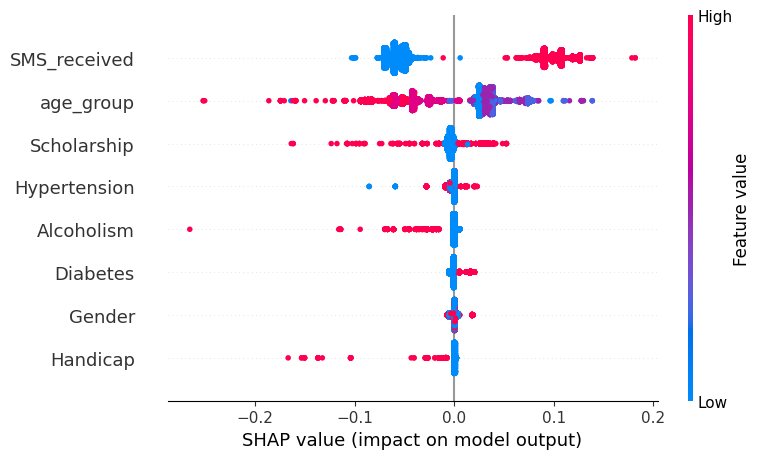

In [129]:
# Ensure X_train and X_test are converted to the correct data type
X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)

# Create SHAP explainer for tree models
explainer = shap.TreeExplainer(DT_gini_smt) 

shap_values = explainer.shap_values(X_test)
# Use SHAP values for class 1 (index 1)
shap_values_binary = shap_values[..., 1]

# Convert X_test to DataFrame if necessary
X_test_df = pd.DataFrame(X_test, columns=feat_names)

# Generate the SHAP summary plot for class 1
shap.summary_plot(shap_values_binary, X_test_df)

#### SHAP visualization for Random Forest

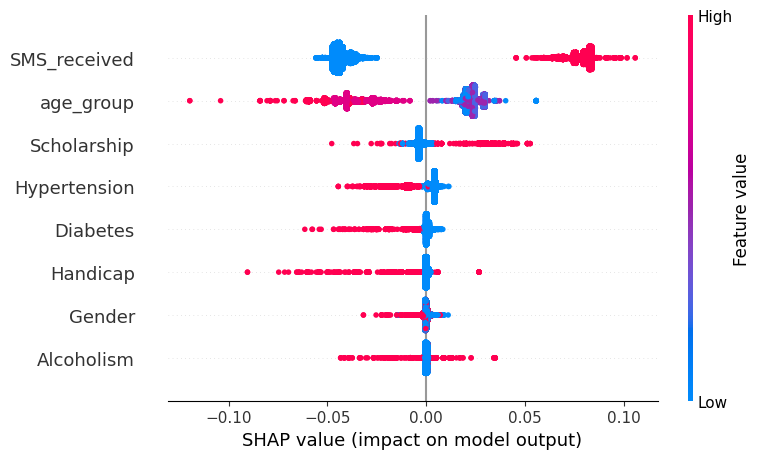

In [134]:
# Ensure X_train and X_test are converted to the correct data type
X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)

# Create SHAP explainer for tree models
explainer = shap.TreeExplainer(RF_entropy_smt) 

shap_values = explainer.shap_values(X_test)
# Use SHAP values for class 1 (index 1)
shap_values_binary = shap_values[..., 1]

# Convert X_test to DataFrame if necessary
X_test_df = pd.DataFrame(X_test, columns=feat_names)

# Generate the SHAP summary plot for class 1
shap.summary_plot(shap_values_binary, X_test_df)

#### SHAP visualization for Gradient Boosting

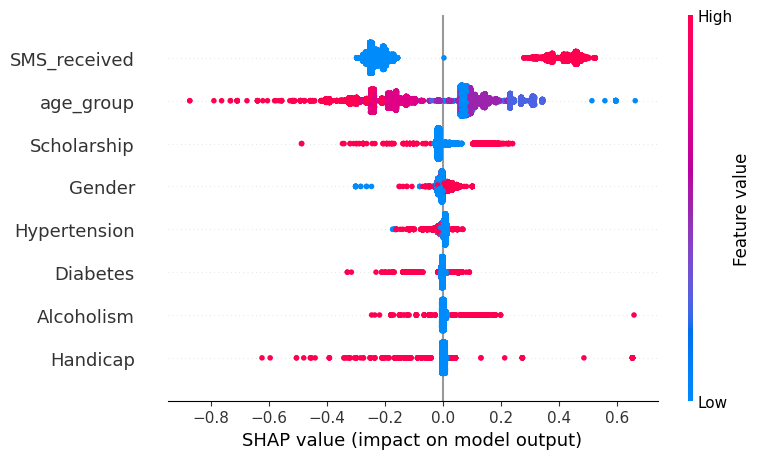

In [135]:
# Ensure X_train and X_test are converted to the correct data type
X_train = np.array(X_train, dtype=np.float64)
X_test = np.array(X_test, dtype=np.float64)

# Create SHAP explainer for the gradient boosting model
explainer = shap.TreeExplainer(gradient_boosting_smt)  # Replace 'GBM_model' with your gradient boosting model variable

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

# Use SHAP values for the positive class (class 1) if it's a binary classifier
if isinstance(shap_values, list):
    shap_values_binary = shap_values[1]
else:
    shap_values_binary = shap_values  # Some implementations return a single array for binary

# Convert X_test to DataFrame if necessary
X_test_df = pd.DataFrame(X_test, columns=feat_names)

# Generate the SHAP summary plot for the positive class (class 1)
shap.summary_plot(shap_values_binary, X_test_df)

This SHAP summary plot shows the impact of features on the model’s predictions:

Y-axis: Lists features, ordered by their overall impact.
X-axis (SHAP values): Indicates impact direction; positive values increase predictions, negative values decrease them.
Color: Represents feature values (red = high, blue = low).
Key insights:

SMS_received: Lower values reduce predictions.
Scholarship: Higher values increase predictions.
Gender, Alcoholism, Handicap: Vary in impact, depending on value.